##**Introduction**

The dataset belongs to a well-known Indian multinational healthcare business that operates many hospital chains in various Indian cities as well as abroad. As we have seen, there was a significant increase in the number of patients being admitted to hospitals during the pandemic, which led to a shortage of beds and other medical supplies. As a result, hospitals are looking into the typical demand for hospitalisation in order to prepare for any sudden needs.

##**Problem Statement**

Perform Univariate and Bivariate Analysis to understand what factors are resulting increase in hospitalization charges. Also find the factors using hypothesis testing (T-Test, Anova Test, Chi-Square test) to understand if features like smoker have dependency on increase in hospitalization and distribution of region, sex in viral load. Provide Proper recommendations which are actionable to understand what factors causes hospitalization and how it can be controlled.

##**Importing Required Libraries**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # T-Test for independent samples
from scipy.stats import chi2_contingency  # Chi-square test of independence
from scipy.stats import shapiro #Shapiro-Wilk’s test for Normality
from scipy.stats import levene  # Levene's test for Equality of Variance
from scipy import stats # Q-Q plot normality Test
from scipy.stats import f_oneway # One-Way Anova Test
from prettytable import PrettyTable

##**Reading Data**

In [ ]:
df=pd.read_csv("data.csv")
df.head()
# output is hidden due to organization policy and to manitain confidentiality

##**Basic Metrics:**

In [64]:
df.shape

(1338, 8)

Total Rows=1338,
Total Cols=8

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


age, viral load, severity level, hospitalization charges are of int type whereas sex, smoker, region are of object type.

In [125]:
df.describe(include="all")

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,NaN,2,2,4,NaN,NaN,NaN
top,NaN,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,NaN,676,1064,364,NaN,NaN,NaN
mean,668.500000,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,386.391641,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,0.000000,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


**Observations:**

1. There are 4 unique categories in region and southeast region has frequency of 364.
2. Male category has a frequency of 676.
3. Smoker category has yes and no values and no occured 1064 times.
4. Viral load has min and max values as 5 and 17 respectively and has almost equal mean and median values.
5. Mean and Median value of hospitalization charges has a significant difference. Also there is large difference in 75th percentile and max value and standard deviation is also high. There may be outliers present in this feature.

In [67]:
df.drop("Unnamed: 0",axis=1,inplace=True)
col_list=["age","sex","smoker","region","severity level"]

for col in col_list:
  print(col,"-")
  print("Distinct Count -",df[col].nunique())
  print("Unique Values",df[col].unique())
  print("Value Counts:")
  print(round(df[col].value_counts(normalize=True)[:10]*100,2))
  print("*"*50)

age -
Distinct Count - 47
Unique Values [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Value Counts:
18    5.16
19    5.08
50    2.17
51    2.17
47    2.17
46    2.17
45    2.17
20    2.17
48    2.17
52    2.17
Name: age, dtype: float64
**************************************************
sex -
Distinct Count - 2
Unique Values ['female' 'male']
Value Counts:
male      50.52
female    49.48
Name: sex, dtype: float64
**************************************************
smoker -
Distinct Count - 2
Unique Values ['yes' 'no']
Value Counts:
no     79.52
yes    20.48
Name: smoker, dtype: float64
**************************************************
region -
Distinct Count - 4
Unique Values ['southwest' 'southeast' 'northwest' 'northeast']
Value Counts:
southeast    27.20
southwest    24.29
northwest    24.29
northeast    24.22
Name: region, dtype: float64
*************************************************

**Observations:**
1. Majority of people are from age group 18-19 year followed by old people of age group 48-53. But adult people of age group are present in dataset.
2. Equal proportion of males and females are present.
3. Around 79% of the people do not smoke whereas there are 21% smokers are present.
4. People from all regions (southwest,southeast,northwest,northeast) are equally present in the dataset.
5. 43% of people have severity level 0, 24% have severity level 1 and 18% have severity level 2.

In [68]:
# Replacing Male and smoker values with 1 and Female and non-smoker values with 0
df_copy=df.copy()
df_copy["sex"].replace(["male","female"],[1,0],inplace=True)
df_copy["smoker"].replace(["yes","no"],[1,0],inplace=True)

# Replacing southeast region with 0, southwest region with 1, northwest region with 2 and northeast region with 3
df_copy["region"].replace(["southeast","southwest","northwest","northeast"],[0,1,2,3],inplace=True)
df_copy.corr()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
age,1.000000,-0.020856,-0.025019,0.006308,0.109300,0.042469,0.299008
sex,-0.020856,1.000000,0.076185,-0.012816,0.046343,0.017163,0.057292
smoker,-0.025019,0.076185,1.000000,-0.038873,0.003739,0.007673,0.787251
region,0.006308,-0.012816,-0.038873,1.000000,-0.262676,0.001205,-0.039473
viral load,0.109300,0.046343,0.003739,-0.262676,1.000000,0.012729,0.198388
severity level,0.042469,0.017163,0.007673,0.001205,0.012729,1.000000,0.067998
hospitalization charges,0.299008,0.057292,0.787251,-0.039473,0.198388,0.067998,1.000000


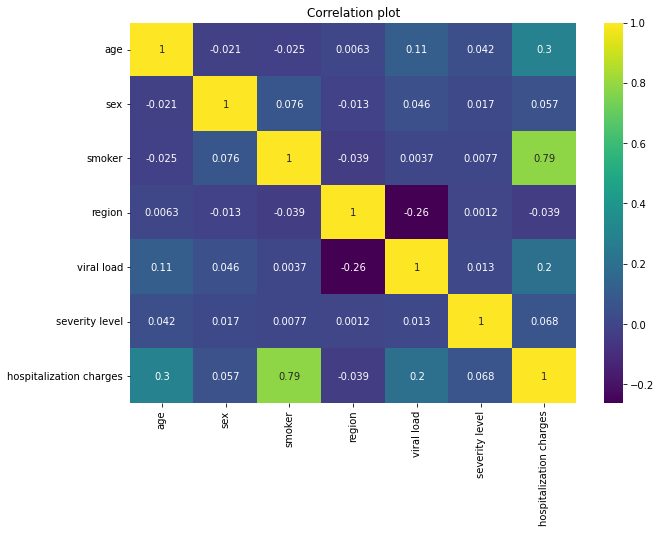

In [69]:
# Correlation plot among features
plt.figure(figsize=(10,7))
sns.heatmap(df_copy.corr(),annot=True, cmap="viridis")
plt.title("Correlation plot")
plt.show()

**Observations:**

1. We can see that smoker is highly correlated with hospitalization charges.
2. Viral load has a correlation with age.
3. Region has a negative correlation with viral load.
4. Age and viral load has some correlation with hospitalization charges.

In [ ]:
sns.pairplot(df_copy)
# output is hidden due to organization policy and to manitain confidentiality

In [71]:
# As severity level has only 5 discrete values so it can be converted to object type

df["severity level"]=df["severity level"].astype("object")

In [72]:
# checking null values

df.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

There are no missing values in dataset.

In [73]:
# checking duplicated value in dataset

np.any(df.duplicated())

True

In [74]:
df[df.duplicated()]

,age,sex,smoker,region,viral load,severity level,hospitalization charges
581,19,male,no,northwest,10.2,0,4099


There is one duplicate value which can be dropped.

In [75]:
# Dropping duplicate values from dataset

df.drop_duplicates(inplace=True)

##**Univariate Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


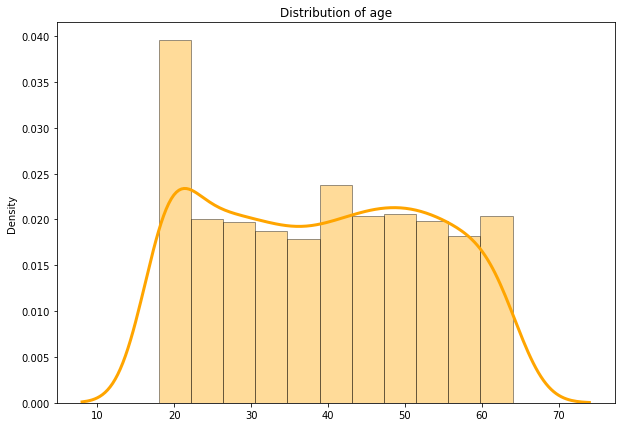

In [76]:
# Distribution plot of age feature 

plt.figure(figsize=(10,7))
sns.distplot(x=df["age"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"},color="orange")
plt.title("Distribution of age")
plt.show()

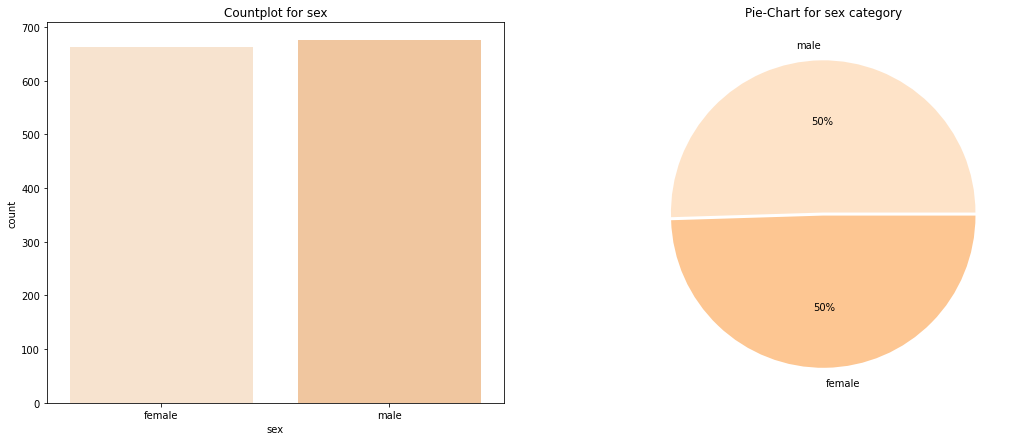

In [77]:
# countplot and pie-chart for sex category 

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")

plt.subplot(1,2,1)
sns.countplot(x="sex",data=df, palette=colors)
plt.title("Countplot for sex")

plt.subplot(1,2,2)
plt.pie(df["sex"].value_counts(),labels=df["sex"].value_counts().index, autopct="%0.0f%%", explode=[0,0.02], colors=colors)
plt.title("Pie-Chart for sex category")

plt.show()

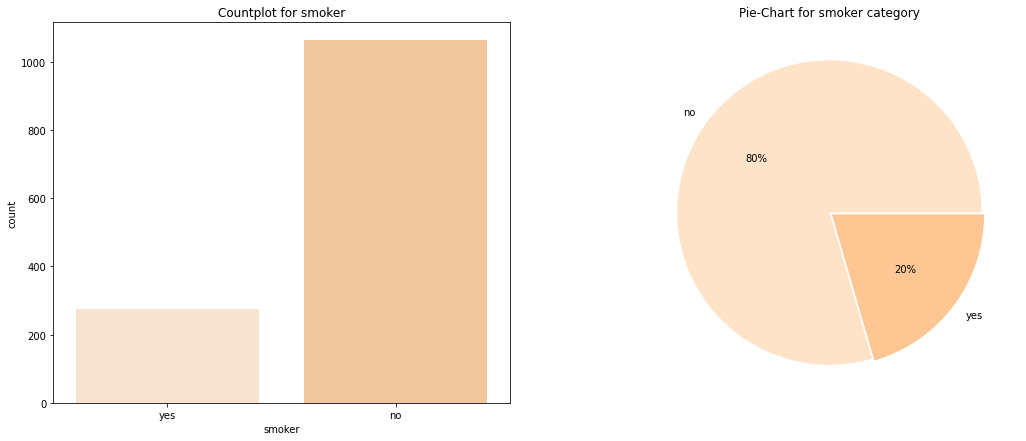

In [78]:
# countplot and pie-chart for smoker category 

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")

plt.subplot(1,2,1)
sns.countplot(x="smoker",data=df, palette=colors)
plt.title("Countplot for smoker")

plt.subplot(1,2,2)
plt.pie(df["smoker"].value_counts(),labels=df["smoker"].value_counts().index, autopct="%0.0f%%", explode=[0,0.02], colors=colors)
plt.title("Pie-Chart for smoker category")

plt.show()

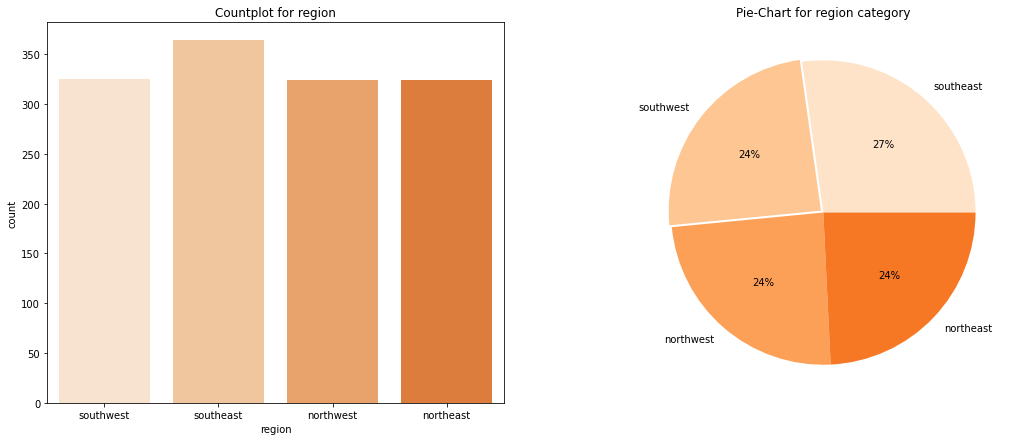

In [79]:
# countplot and pie-chart for region category 

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")

plt.subplot(1,2,1)
sns.countplot(x="region",data=df, palette=colors)
plt.title("Countplot for region")

plt.subplot(1,2,2)
plt.pie(df["region"].value_counts(),labels=df["region"].value_counts().index, autopct="%0.0f%%", explode=[0,0.02,0,0], colors=colors)
plt.title("Pie-Chart for region category")

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


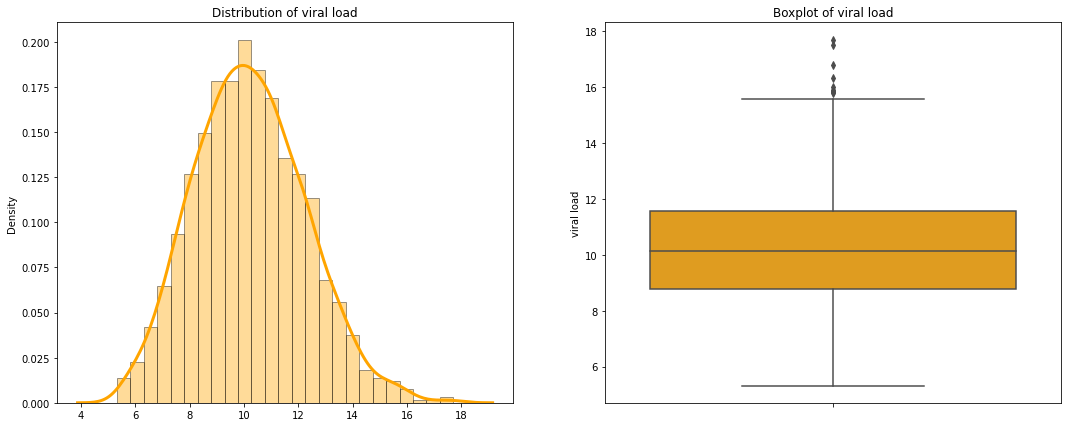

In [80]:
#Distribution plot of viral load feature

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")
plt.subplot(1,2,1)
sns.distplot(x=df["viral load"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"},color="orange")
plt.title("Distribution of viral load")

plt.subplot(1,2,2)
sns.boxplot(y="viral load",data=df,color="orange")
plt.title("Boxplot of viral load")
plt.show()

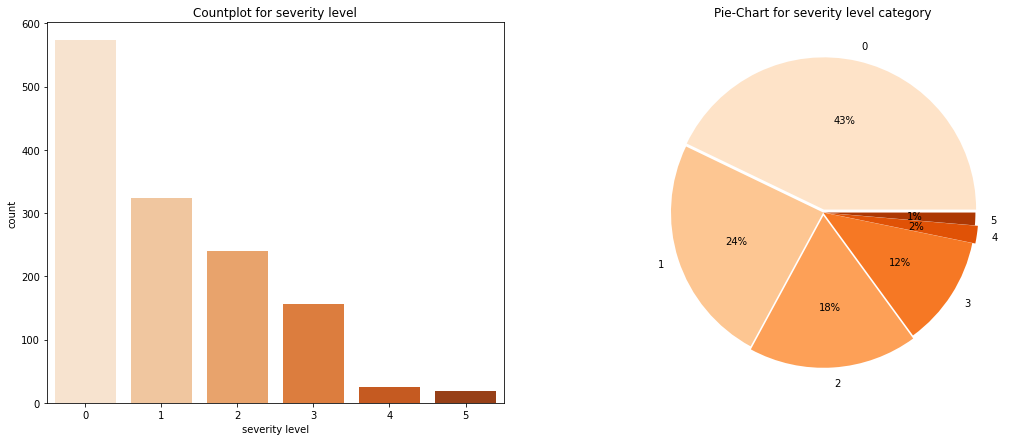

In [81]:
# countplot and pie-chart for severity level category 

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")

plt.subplot(1,2,1)
sns.countplot(x="severity level",data=df, palette=colors)
plt.title("Countplot for severity level")

plt.subplot(1,2,2)
plt.pie(df["severity level"].value_counts(),labels=df["severity level"].value_counts().index, autopct="%0.0f%%", explode=[0.02,0,0.02,0,0.02,0], colors=colors)
plt.title("Pie-Chart for severity level category")

plt.show()

In [ ]:
# Distribution and Log Normal Distribution plot of hospitalization charges

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")
plt.subplot(1,2,1)
sns.distplot(x=df["hospitalization charges"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"},color="orange")
plt.title("Distribution of hospitalization charges")

plt.subplot(1,2,2)
sns.distplot(x=np.log(df["hospitalization charges"]),hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"},color="orange")
plt.title("Log-Normal Distribution of hospitalization charges")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Boxplot of hospitalization charges

plt.figure(figsize=(10,7))
colors=sns.color_palette("Oranges")
sns.boxplot(y="hospitalization charges",data=df,color="orange")
plt.title("Boxplot of hospitalization charges")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

**Observations:**
1. Age groups of 20-65 years are present in the dataset.
2. Data is balanced in terms of sex category. 51% are males whereas 49% are females.
3. 80% of the people are from non-smoker category whereas 20% of people are from smoker category.
4. Data is balanced in terms of region. Equal proportion of people are present from each region.
5. Viral load is properly forming bell-shaped curve depicting that it is normally distributed with mean close to 10.
6. Median of viral load is close to 10 with 100th percentile close to 16. There are few outliers present in viral load.
7. Majority of the people have a severity level of 0 followed by severity level 1 and 2.
8. Most of the people have a hospitalization charge of ~25000. Very few people have hospitalization charge above 1 Lakh. It seems to be following right skewed log Normal Distribution.
9. Hospitalization charge have a median value close to 23k. There are many outliers present here.

##**Bi-Variate Analysis**

In [ ]:
# Barplot and scatterplot for age groups v/s hospitalization charges

age_bins=[17,25,40,55,65]
age_groups=["Youth","Adults","Middle Aged","Old Aged"]
df["age_bins"]=pd.cut(df["age"],bins=age_bins,labels=age_groups)

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")
plt.subplot(1,2,1)
sns.barplot(x="age_bins",y="hospitalization charges",data=df,palette=colors)
plt.title("Barplot for age groups v/s hospitalization charges")

plt.subplot(1,2,2)
sns.lineplot(x="age",y="hospitalization charges", hue="age_bins", data=df)
plt.title("Lineplot for age groups v/s hospitalization charges")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Barplot and Boxplot for sex v/s hospitalization charges

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")
plt.subplot(1,2,1)
sns.barplot(y="hospitalization charges",x="sex",data=df, palette=colors)
plt.title("Barplot for sex v/s hospitalization charges")

plt.subplot(1,2,2)
sns.boxplot(y="hospitalization charges",x="sex",data=df, palette=colors)
plt.title("Boxplot for sex v/s hospitalization charges")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Barplot and Boxplot for smoker v/s hospitalization charges

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")
plt.subplot(1,2,1)
sns.barplot(y="hospitalization charges",x="smoker",data=df, palette=colors)
plt.title("Barplot for smoker v/s hospitalization charges")

plt.subplot(1,2,2)
sns.boxplot(y="hospitalization charges",x="smoker",data=df, palette=colors)
plt.title("Boxplot for smoker v/s hospitalization charge")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

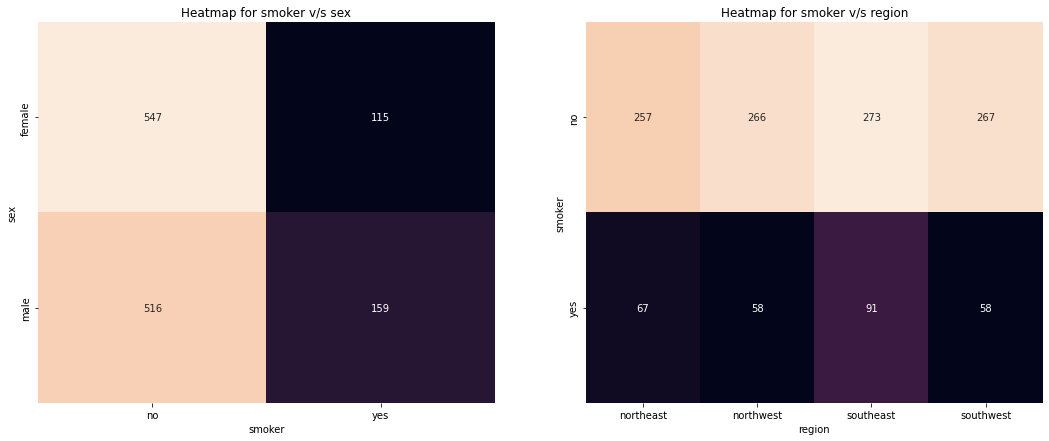

In [87]:
# Heatmap for smoker v/s sex and smoker v/s region

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(df["sex"],df["smoker"]), annot=True,fmt=".4g", cbar=False)
plt.title("Heatmap for smoker v/s sex")

plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(df["smoker"],df["region"]), annot=True,fmt=".4g", cbar=False)
plt.title("Heatmap for smoker v/s region")
plt.show()

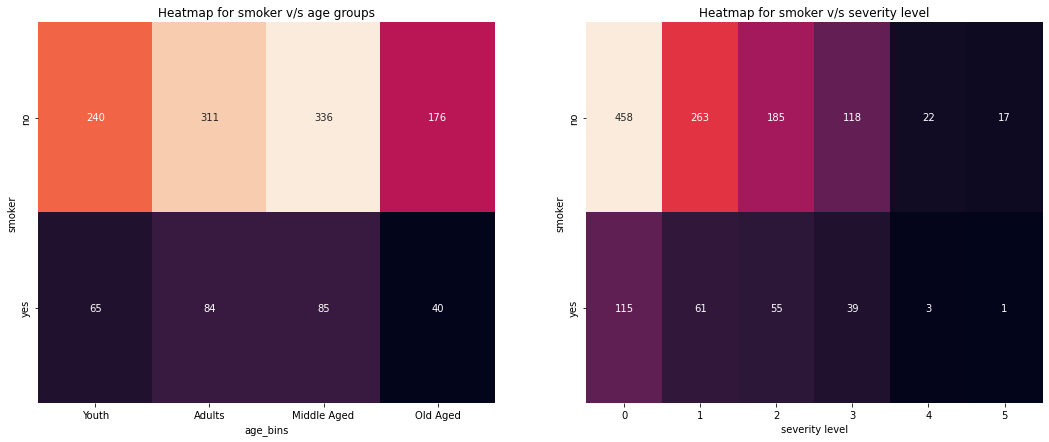

In [88]:
# Heatmap for smoker v/s age groups and smoker v/s severity level

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(df["smoker"],df["age_bins"]), annot=True, cbar=False,fmt=".4g")
plt.title("Heatmap for smoker v/s age groups")

plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(df["smoker"],df["severity level"]), annot=True, cbar=False,fmt=".4g")
plt.title("Heatmap for smoker v/s severity level")
plt.show()

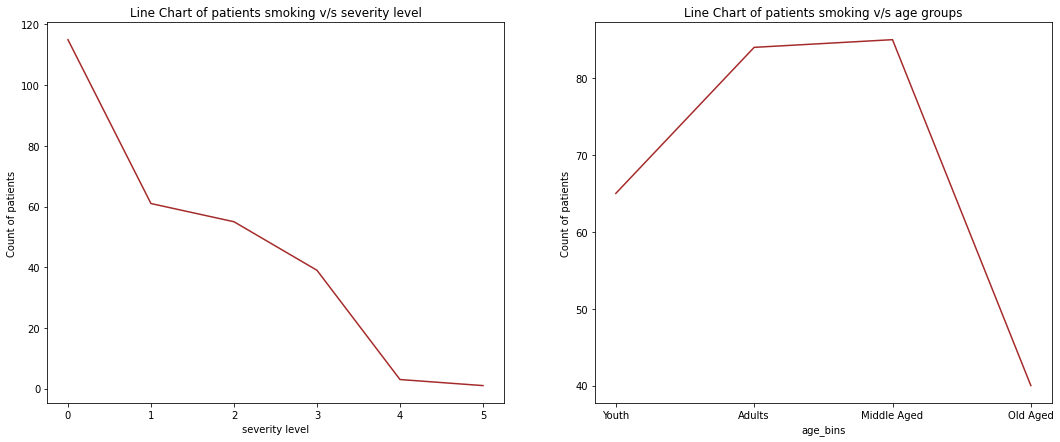

In [89]:
# Line Chart of patients smoking v/s severity level and smoking v/s age groups

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.lineplot(x="index",y="severity level",data=df[df["smoker"]=="yes"]["severity level"].value_counts().reset_index(),color="brown")
plt.xlabel("severity level")
plt.ylabel("Count of patients")
plt.title("Line Chart of patients smoking v/s severity level")

plt.subplot(1,2,2)
sns.lineplot(x="index",y="age_bins",data=df[df["smoker"]=="yes"]["age_bins"].value_counts().reset_index(),color="brown")
plt.xlabel("age_bins")
plt.ylabel("Count of patients")
plt.title("Line Chart of patients smoking v/s age groups")
plt.show()

In [ ]:
# Barplot and Boxplot for region v/s hospitalization charges

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")
plt.subplot(1,2,1)
sns.barplot(y="hospitalization charges",x="region",data=df, palette=colors)
plt.title("Barplot for region v/s hospitalization charge")

plt.subplot(1,2,2)
sns.boxplot(y="hospitalization charges",x="region",data=df, palette=colors)
plt.title("Boxplot for region v/s hospitalization charge")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Barplot for region v/s hospitalization charge

plt.figure(figsize=(10,7))
colors=sns.color_palette("Oranges")
sns.barplot(x="region",y="hospitalization charges",
            data=df.groupby(["region"])["hospitalization charges"].sum().reset_index(),
            palette=colors)
plt.title("Barplot for region v/s hospitalization charge")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Barplot for viral load v/s hospitalization charge

bins=[6,10,14,18]
groups=["low","mid","high"]
df["viral_load_bins"]=pd.cut(df["viral load"],bins=bins,labels=groups)

plt.figure(figsize=(10,7))
colors=sns.color_palette("Oranges")
sns.barplot(x="viral_load_bins",y="hospitalization charges",
            data=df.groupby(["viral_load_bins"])["hospitalization charges"].mean().reset_index(),
            palette=colors)
plt.title("Barplot for viral load v/s hospitalization charge")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Barplot and Boxplot for severity level v/s hospitalization charges

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")
plt.subplot(1,2,1)
sns.barplot(y="hospitalization charges",x="severity level",data=df, palette=colors)
plt.title("Barplot for severity level v/s hospitalization charge")

plt.subplot(1,2,2)
sns.boxplot(y="hospitalization charges",x="severity level",data=df, palette=colors)
plt.title("Boxplot for severity level v/s hospitalization charge")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. Old aged people have high value of hospitalization charge compared to young people.
2. Males have a high mean value of hospitalization charge compared to Females whereas median value for both male and female is almost equal. There are more outliers for female than males.
3. There is a large difference in mean/median value of hospitalization charge for smokers and non-smokers. Outliers are only present in non-smoker category.
4. Mean and median values of hospitalization charge for each region except southeast is almost equal. There are less outliers in southeast region compared to rest regions.
5. Mean and median value of Severity level 0 and 1 is amost equal and have more of hospitalization charge outliers compared to other severity level.
6. Adults and Middle aged people are smoking more than young and aged people.

##**MultiVariate Analysis**

In [ ]:
# Regplot for viral load v/s hospitalization charges for sex and smoker

plt.figure(figsize=(10,7))
sns.FacetGrid(df,col="smoker",height=5, aspect=1.2).map(sns.regplot,"viral load","hospitalization charges", color="brown")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Barplot and Boxplot of sex v/s hospitalization charges for smoker and non-smoker category

plt.figure(figsize=(18,7))
colors=sns.color_palette("Oranges")
plt.subplot(1,2,1)
sns.barplot(y="hospitalization charges",x="sex",hue="smoker",data=df, palette=colors)
plt.title("Barplot for sex v/s hospitalization charge")

plt.subplot(1,2,2)
sns.boxplot(y="hospitalization charges",x="sex",hue="smoker",data=df, palette=colors)
plt.title("Boxplot for sex v/s hospitalization charge")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

**Observations:**
1. There seems to be a linear relationship between viral load and hospitalization charge for people who do smoking.
2. Males who do smoking have high average hospitalization charge compared to female who do smoking.

##**Outlier Detection & Correction**

In [96]:
# checking outliers using Inter Quartile Range for hospitalization charges and viral load

continuous_col=["viral load", "hospitalization charges"]

def check_outliers(df,col):
  quartiles=np.percentile(df[col],np.arange(0,100,25))
  IQR=round(quartiles[3]-quartiles[1],2)
  print("Inter Quartile Range for "+str(col)+":",IQR)
  min_value=round((quartiles[1] - (1.5*IQR)),2)
  max_value=round((quartiles[3] + (1.5*IQR)),2)
  print("minimum value for "+str(col)+":",min_value)
  print("maximum value for "+str(col)+":",max_value)

for col in continuous_col:
  check_outliers(df,col)
  print("*"*50)

# As viral load is distributed normally, outliers can also be determined using empirical formula i.e 99.9% of data lies between mean-3(sigma) and mean+3(sigma)

viral_load_mean=round(df["viral load"].mean(),2)
viral_load_std=round(df["viral load"].std(),2)

min_value=round(viral_load_mean - (3*viral_load_std) ,2)
max_value=round(viral_load_mean + (3*viral_load_std) ,2)

print("minimum value for viral load using empirical formula:",min_value)
print("maximum value for viral load using empirical formula:",max_value)

# output is hidden due to organization policy and to manitain confidentiality

Inter Quartile Range for viral load: 2.81
minimum value for viral load: 4.54
maximum value for viral load: 15.78
**************************************************
Inter Quartile Range for hospitalization charges: 29778.0
minimum value for hospitalization charges: -32801.0
maximum value for hospitalization charges: 86311.0
**************************************************
minimum value for viral load using empirical formula: 4.13
maximum value for viral load using empirical formula: 16.31


In [97]:
print("Percentage of outliers for viral load is",round((len(df[(df["viral load"]<4.55) | (df["viral load"]>15.78)])*100)/len(df),2) ,"%")
print("Percentage of outliers for hospitalization charges is",round((len(df[df["hospitalization charges"]>86222])*100)/len(df),2) ,"%")

Percentage of outliers for viral load is 0.67 %
Percentage of outliers for hospitalization charges is 10.4 %


In [98]:
# As hospitalization charges outliers is close to 10% so clipping it between 0 to 89 percentile.

percentiles=df["hospitalization charges"].quantile([0,0.89]).values
df_copy=df.copy()
df_copy["hospitalization charges"]=np.clip(df["hospitalization charges"],percentiles[0],percentiles[1])

# As viral load outliers is less than 1% these can be dropped

viral_load_outliers=df_copy[(df_copy["viral load"]<4.55) | (df_copy["viral load"]>15.78)]
df_copy.drop(viral_load_outliers.index,axis=0,inplace=True)

In [99]:
# outlier check after clipping of hospitalization charges and dropping outliers in viral laod
print("Percentage of outliers for viral load is",round((len(df_copy[(df_copy["viral load"]<4.55) | (df_copy["viral load"]>15.78)])*100)/len(df_copy),2) ,"%")
print("Percentage of outliers for hospitalization charges is",round((len(df_copy[df_copy["hospitalization charges"]>86222])*100)/len(df_copy),2) ,"%")

Percentage of outliers for viral load is 0.0 %
Percentage of outliers for hospitalization charges is 0.0 %


##**Hypothesis Testing**

##**1.	Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?**

##Step1: Define Null and Alternate Hypothesis

H0: Hospitalization charges of smokers and non-smokers are equal.

Ha: Hospitalization charges of smokers is greater than non-smokers.


Let 𝜇1 and 𝜇2 be the average hospitalization charges of smokers and non smokers.

Mathematically, above formaulated hypothesis can be written as:

H0: 𝜇1 = 𝜇2

Ha: 𝜇1 < 𝜇2

##Step2: Select Appropriate Test

In [100]:
smoker=df[df["smoker"]=="yes"]["hospitalization charges"].sample(200)
nonsmoker=df[df["smoker"]=="no"]["hospitalization charges"].sample(200)

In [101]:
print("Sample Standard deviation of hospitalization charges for smoker",round(smoker.std(),2))
print("Sample Standard deviation of hospitalization charges for nonsmoker",round(nonsmoker.std(),2))

Sample Standard deviation of hospitalization charges for smoker 29342.58
Sample Standard deviation of hospitalization charges for nonsmoker 15604.71


As Sample standard deviation are different, population standard deviation can be different. As population standard deviation is unknown, 2 sample independent t-test would be appropriate.

##Step3: Selecting Significance Level

Selecting alpha as 0.05

In [102]:
alpha=0.05

##Step4: Calculating p-Value

In [103]:
ttest_statistic, p_value_smoker=ttest_ind(smoker,nonsmoker, equal_var=False,alternative="greater")

print("ttest_statistic:",ttest_statistic)
print("p value:",p_value_smoker)
print("*"*50)

if p_value_smoker>alpha:
  print("As p value is greater than significance value, fail to reject the null hypothesis.")
else:
  print("As p value is less than significance value, reject null hypothesis.")

ttest_statistic: 26.23641409754355
p value: 2.656753367085435e-80
**************************************************
As p value is less than significance value, reject null hypothesis.


**Conclusion:**

Since p value is less than 5% significance value, we are rejecting null hypothesis. Hence we have enough statistical evidence to prove that average hospitalization charges is more for people who do smoking.

##**2. Prove (or disprove) with statistical evidence that the viral load of females is different from that of males**

##Step1: Define Null and Alternate Hypothesis

H0: Viral Load of Females and Males are same.

Ha: Viral Load of Females and Males are different.

Let 𝜇1 and 𝜇2 be the average Viral Load of females and males.

Mathematically, above formaulated hypothesis can be written as:

H0: 𝜇1 = 𝜇2

Ha: 𝜇1 != 𝜇2

##Step2: Select Appropriate Test

In [104]:
female=df[df["sex"]=="female"]["viral load"].sample(300)
male=df[df["sex"]=="male"]["viral load"].sample(300)

In [105]:
print("Sample Standard deviation of viral load for female",round(female.std(),2))
print("Sample Standard deviation of viral load for male",round(male.std(),2))

Sample Standard deviation of viral load for female 1.97
Sample Standard deviation of viral load for male 1.96


As Sample standard deviation of viral load for males and females are almost same. Population standard deviation might be same. As population standard deviation is not known, 2 sample independent t-test would be appropriate.

##Step3: Selecting Significance Level
Selecting alpha as 0.05

In [106]:
alpha=0.05

##Step4: Calculating p-Value

In [107]:
ttest_statistic, p_value_sex=ttest_ind(female,male, equal_var=False)

print("ttest_statistic:",ttest_statistic)
print("p value:",p_value_sex)
print("*"*50)

if p_value_sex>alpha:
  print("As p value is greater than significance value, fail to reject the null hypothesis.")
else:
  print("As p value is less than significance value, reject null hypothesis.")

ttest_statistic: 1.1406490064081467
p value: 0.2544726297746048
**************************************************
As p value is greater than significance value, fail to reject the null hypothesis.


**Conclusion:**

Since p value is greater than 5% significance value, we failed to reject null hypothesis. Hence we have enough statistical evidence to prove that viral load for females and males are equal.

##**3. Is the proportion of smoking significantly different across different regions**

##Step1: Define Null and Alternate Hypothesis

H0: Proportion of smoking is same across all regions.

Ha: Proportion of smoking is different across all regions.

##Step2: Select Appropriate Test

As Smoker and region both are categorical variable and we need to determine proportion of category1 in category 2, chi-square test would be appropriate test.


In [108]:
smoker_region_contingency=pd.crosstab(df["smoker"],df["region"])
smoker_region_contingency

# output is hidden due to organization policy and to manitain confidentiality

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


##Step3: Selecting Significance Level
Selecting alpha as 0.05

In [109]:
alpha=0.05

##Step4: Calculating p-Value

In [110]:
chi2test_statistic,p_value_region,dof,expected_values=chi2_contingency(smoker_region_contingency)

print("Chi-square test statistic:",chi2test_statistic)
print("p value:",p_value_region)
print("DOF:",dof)
print("Expected Values:",expected_values)
print("*"*50)
if p_value_region>alpha:
  print("As p value is greater than significance value, fail to reject the null hypothesis.")
else:
  print("As p value is less than significance value, reject null hypothesis.")

Chi-square test statistic: 7.277902541321909
p value: 0.06354826573182332
DOF: 3
Expected Values: [[257.60059835 257.60059835 289.40314136 258.39566193]
 [ 66.39940165  66.39940165  74.59685864  66.60433807]]
**************************************************
As p value is greater than significance value, fail to reject the null hypothesis.


**Conclusion:**

Since p value is greater than 5% significance value, we failed to reject null hypothesis. Hence we do not have enough statistical evidence to prove that proportion of smoker is different across different region.

##**4. Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same**

##Step1: Define Null and Alternate Hypothesis

H0: Mean Viral Load of Females is same for severity level 0,1 and 2.

Ha: Mean Viral Load of Females is different for severity level 0,1 and 2.

##Step2: Select Appropriate Test

In [111]:
df_female=df[df["sex"]=="female"]

severity_0=df_female[df_female["severity level"]==0]["viral load"].sample(100)
severity_1=df_female[df_female["severity level"]==1]["viral load"].sample(100)
severity_2=df_female[df_female["severity level"]==2]["viral load"].sample(100)

In [112]:
df_female.shape

(662, 9)

In [113]:
df_female.groupby(["severity level"])["viral load"].describe()

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,289.0,10.120727,1.989071,5.76,8.7300,9.980,11.5300,15.80
1,158.0,10.017468,1.929065,5.60,8.6575,9.855,11.3150,15.36
2,119.0,10.216807,2.209687,5.73,8.5900,10.430,11.5850,16.02
3,77.0,10.145974,1.944119,6.33,8.7700,10.070,11.3700,14.90
4,11.0,10.647273,1.728746,8.53,9.6400,9.880,11.1700,13.82
5,8.0,10.206250,2.975480,6.10,8.0500,10.080,11.6625,15.58


One way Anova test could be the appropriate test provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

1) The samples are independent.

2) Each sample is from a normally distributed population.

3) The population variance of the groups are all equal.

Now, we will be using the following statistical tests to check the normality and euality of variance of the data set - For testing of normality, Shapiro-Wilk’s test is applied to the response variable. For equality of variance, Levene test is applied to the response variable.

##Shapiro-Wilk’s test:
H0: Volume follows Normal Distribution.

Ha: Volume does not follows Normal Distribution.

In [114]:
test_statistic,p_value=shapiro(df_female['viral load'].sample(500))

print("test_statistic:",test_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis")
else:
  print("As p value is less than significance value,reject null hypothesis")

test_statistic: 0.9929621815681458
p value: 0.019147265702486038
**************************************************
As p value is less than significance value,reject null hypothesis


##Levene's test:

H0: Variance for viral load is equal for each severity level.

Ha: Atleast one variance is different from the rest.

In [115]:
test_statistic,p_value=levene(severity_0,severity_1,severity_2)

print("test_statistic:",test_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis")
else:
  print("As p value is less than significance value,reject null hypothesis")

test_statistic: 1.669508764801929
p value: 0.1901021341402247
**************************************************
As p value is greater than significance value, fail to reject null hypothesis


**Conclusion:**

1) As seen in above test, distribution of viral load for female is foolowing normal distribution.

2) Variance of groups with severity level 0, 1 and 2 are equal.

##Basic methods (other than statistical tests) to test the normality &homogeneity of variance:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


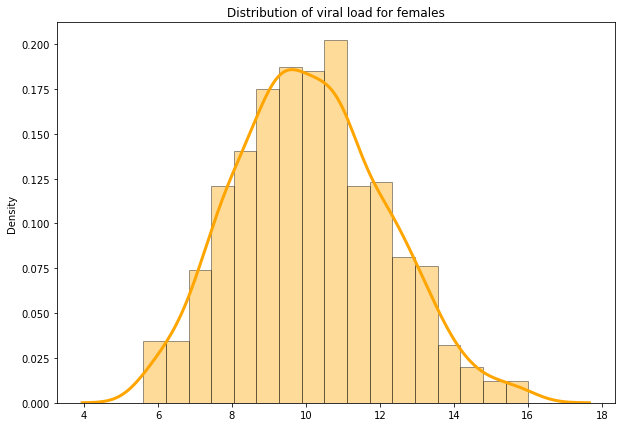

In [116]:
# checking normality using histogram

plt.figure(figsize=(10,7))
sns.distplot(x=df_female["viral load"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"},color="orange")
plt.title("Distribution of viral load for females")
plt.show()

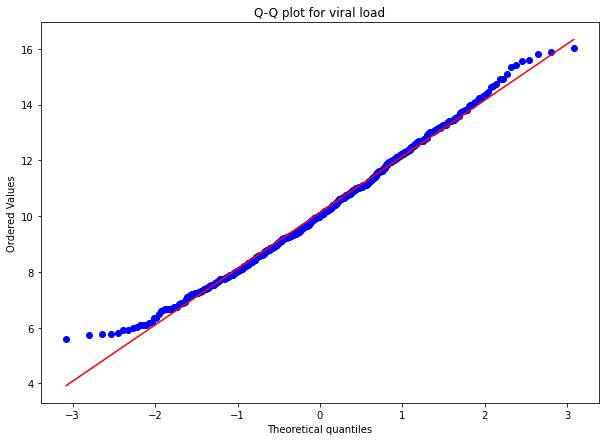

In [117]:
# checking normality using Q-Q plot

plt.figure(figsize=(10,7))
stats.probplot(df_female["viral load"], dist="norm", fit=True,plot=plt)
plt.title("Q-Q plot for viral load")
plt.show()

In [118]:
# checking homogenity of variance:

print("severity level 0 var:",round(severity_0.var(),2))
print("severity level 1 var:",round(severity_1.var(),2))
print("severity level 2 var:",round(severity_2.var(),2))

severity level 0 var: 3.71
severity level 1 var: 3.08
severity level 2 var: 4.43


##Step 3: Selecting Significance Level

In [119]:
alpha=0.05

##Step 4: Calculating p-value

In [120]:
test_statistic,p_value=f_oneway(severity_0,severity_1,severity_2)

print("test_statistic:",test_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis")
else:
  print("As p value is less than significance value,reject null hypothesis")

test_statistic: 0.35534950350497163
p value: 0.7012260205521488
**************************************************
As p value is greater than significance value, fail to reject null hypothesis


**Conclusion:**

Since the p-value is greater than the 5% significance level, we failed to reject the null hypothesis.Hence, we have enough statistical evidence to prove that mean Viral Load of Females is same for severity level 0,1 and 2.

In [121]:
# Summary of Hypothesis Testing using pretty Table

table=PrettyTable(["Index","Null Hypothesis","Test","p value","Result"])
table.add_row(["1.","Hospitalization charges of smokers and non-smokers are equal","T-Test",round(p_value_smoker,2),"Reject H0"])
table.add_row(["2.","Viral Load of Females and Males are same","T-Test",round(p_value_sex,2),"Accept H0"])
table.add_row(["3.","Proportion of smoking is same across all regions","Chi-Square Test",round(p_value_region,2),"Accept H0"])
table.add_row(["4.","Mean Viral Load of Females is same for severity level 0,1 and 2.","Anova Test",round(p_value,2),"Accept H0"])
print(table)

+-------+------------------------------------------------------------------+-----------------+---------+-----------+
| Index |                         Null Hypothesis                          |       Test      | p value |   Result  |
+-------+------------------------------------------------------------------+-----------------+---------+-----------+
|   1.  |   Hospitalization charges of smokers and non-smokers are equal   |      T-Test     |   0.0   | Reject H0 |
|   2.  |             Viral Load of Females and Males are same             |      T-Test     |   0.25  | Accept H0 |
|   3.  |         Proportion of smoking is same across all regions         | Chi-Square Test |   0.06  | Accept H0 |
|   4.  | Mean Viral Load of Females is same for severity level 0,1 and 2. |    Anova Test   |   0.7   | Accept H0 |
+-------+------------------------------------------------------------------+-----------------+---------+-----------+


##**Insights:**

1. People who smoke has high average value of hospitalization charges compared to non-smokers.
2. Age and Hospitalisation charge have a relatively linear connection,it is high for the old aged while its less for the young. The same thing was observed in the correlation plot.
3. With increase in viral load, hospitalization charges is also increasing for people who do smoking. But for non-smokers same is not observed.
4. Males have high Hospitalisation charge compared to females. Also, number of male smokers are more than female smokers.
5. Males who do smoking have high average hospitalization charge compared to female who do smoking.
6. Average Hospitalization charge from southeast region is more as the number of smoker from southeast region is highest among other regions.
7. Average Hospitalization charge is high for people having severity level 2 and 3 whereas it is low for severity level 0 and 5.
8. Smoking has a dependency on Age group. Adults and Middle aged people tends to smoke more frequently than young and old age group people.
9. Severity level has a inverse relation with smoking. As the severity level of patients is increasing, no of people who smoke is decreasing.

##**Recommendations:**

1. Smoking is the one of the primary reason for hospitalization. Hospital can launch some Anti smoking compaign to discourage people especially males from smoking and can demonstrate the impact of smoking on human body and some efficient ways to stop it.
2. There are patients who are smoking even at the severity level of 2 and 3. They should be highly discouraged to quit smoking.
3. As per analysis, Older people are getting more hospitalized than young people. A plan like routine health checks can be added by an insurance provider to identify sickness at very beginning level. Also some discount in insurance can be provided to these people to lower their insurance cost.
4. When compared to other region,total cost of hospitalisation is higher in southeast region.Some research can be conducted in southeast area to determine the causes of the region's rising illness rates and to determine the best course of action.
5. As Patients with high viral load have higher average hospitalization charge, proper health advise, routine check-up and well treatment should be given to these patients so that they can recover quickly.